## Proyecto Final Logística 
---
<li>Luna Moreno</li>
<li>Carles Adam</li>
<li>Enrique Sayas</li>

## 0. Cargar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS

from structure import instance, solution
from algorithms import grasp

## 1. Introducción

In [2]:
def resolver(path, alpha, tiempo):
    inst = instance.readInstance(path)
    sol, _, _ = grasp.execute(inst, tiempo, alpha)
    solution.printSolution(sol)
    return sol["sol"]

def visualizar_solucion(path, alpha=None, tiempo=1):
    if alpha != None:
        sol = resolver(path, alpha, tiempo)
    else:
        sol = []

    # Cargar el archivo con las distancias
    distancias = pd.read_table(path, sep = " ", skiprows=1, header=None)
    # Creamos la matriz de distancias
    n_nodos = distancias.loc[:,1].max()+1
    matriz_distancias = np.zeros([n_nodos,n_nodos])

    for _ , fila in distancias.iterrows():
        i, j, distancia = fila
        matriz_distancias[int(i),int(j)] = distancia
        matriz_distancias[int(j),int(i)] = distancia

    # Visualizamos su representación en 2D
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=33)
    coordenadas_2d = mds.fit_transform(matriz_distancias)

    # Etiquetas para los puntos (opcional)
    colores = ["#efb810" if i in sol else "black" for i, (x, y) in enumerate(coordenadas_2d)]

    plt.figure(figsize=(6, 6))
    plt.scatter(coordenadas_2d[:, 0], coordenadas_2d[:, 1], color=colores, marker='o')     

    plt.title("Puntos en 2D a partir de la matriz de distancias")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.grid(True)
    plt.show()

Solution: 128 130 3 383 392 8 394 269 142 270 404 150 407 409 283 155 285 160 289 419 35 39 423 304 435 52 315 318 191 67 456 72 335 464 216 347 479 480 229 103 104 487 362 238 115 254 378 123 382 127 
Objective Value: 7693.0


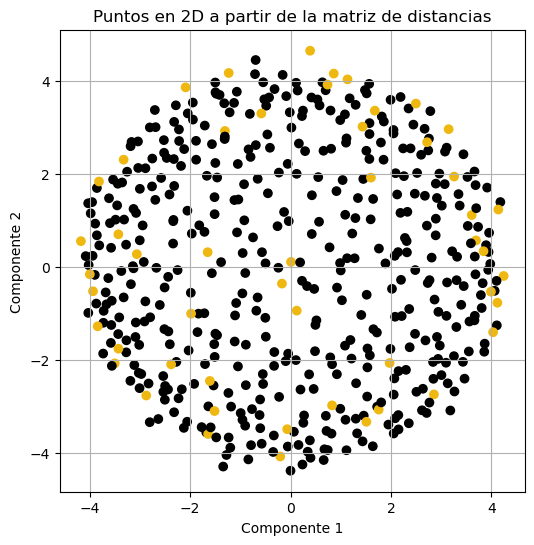

In [3]:
visualizar_solucion("instances/MDG-a_9_n500_m50.txt",alpha=0)

## 2. Modelo GRASP

### 2.1. Calibrar $\alpha$

### 2.1.1 1 segundo de tiempo de ejecución

In [4]:
def calibrar_alfa(path):
    data = pd.read_csv(path, sep=";")
    
    # Calcular el máximo y la desviación estándar
    data["Maximo"] = float(0)
    for archivo in data["archivo"].unique():
        data.loc[data["archivo"] == archivo,"Maximo"] = data[data["archivo"] == archivo]["valor"].values.max()
    data["Dev"] = (data["Maximo"] - data["valor"]) / data["Maximo"]
    
    alpha_max = data.loc[:,["alpha","Dev"]].groupby("alpha").mean("Dev").sort_values("Dev").head(1).index[0]

    data["Color"] = ['Maximo' if x[1]["valor"] == x[1]["Maximo"] else "Otros" for x in data.iterrows()]
    data.loc[data["alpha"] == alpha_max, "Color"] = f"$\\alpha$ = {alpha_max}"

    return data, alpha_max

data_1, alpha_max_1 = calibrar_alfa("resultados/resultados_1.0s.csv")

# Seleccionar el mejor alfa
data_1.loc[:,["alpha","Dev"]].groupby("alpha").mean("Dev").sort_values("Dev").head()

,Dev
alpha,
0.05,0.003572
0.15,0.003696
0.10,0.003820
0.00,0.003961
0.20,0.004626


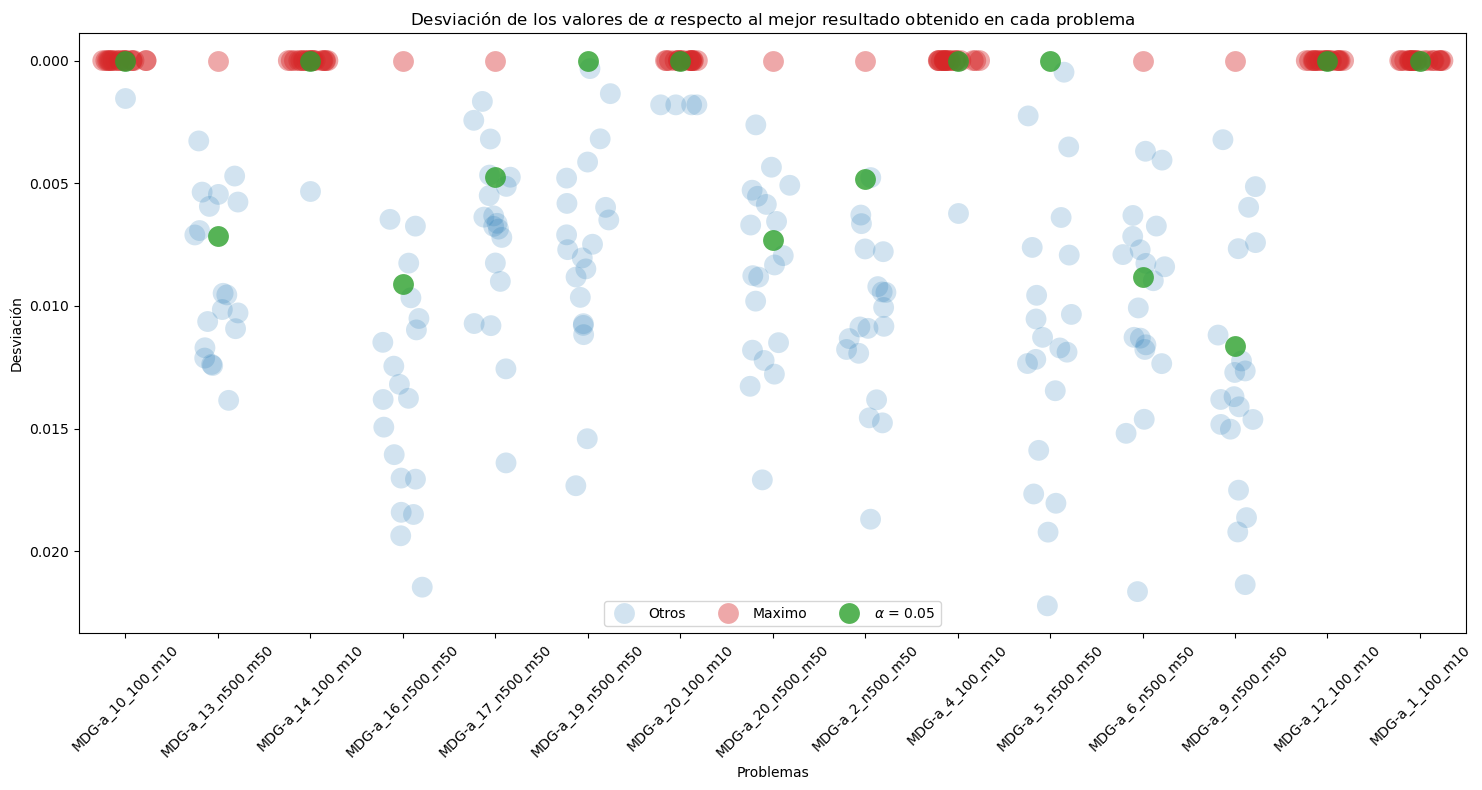

In [5]:
custom_palette = {
    'Otros': '#1f77b4',
    f"$\\alpha$ = {alpha_max_1}": '#2ca02c',
    'Maximo': '#d62728'
}

fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(data=data_1[data_1["Color"] == "Otros"], x="archivo", y="Dev", hue="Color", alpha=0.2, ax=ax, size=15, jitter=0.25, palette=custom_palette)
sns.stripplot(data=data_1[data_1["Color"] == "Maximo"], x="archivo", y="Dev", hue="Color", alpha=0.4, ax=ax, size=15, jitter=0.25, palette=custom_palette)
sns.stripplot(data=data_1[data_1["Color"] == f"$\\alpha$ = {alpha_max_1}"], x="archivo", y="Dev", hue="Color", alpha=0.8, ax=ax, size=15, jitter=0.25, palette=custom_palette)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel("Problemas")
ax.set_ylabel("Desviación")
ax.invert_yaxis()
plt.title("Desviación de los valores de $\\alpha$ respecto al mejor resultado obtenido en cada problema")
plt.legend(ncol=3, loc="lower center", bbox_to_anchor=(0.5, 0))
plt.tight_layout()
plt.show()

### 2.1.2 5 segundos de tiempo de ejecución

In [6]:
data_5, alpha_max_5 = calibrar_alfa("resultados/resultados_5.0s.csv")

# Seleccionar el mejor alfa
data_5.loc[:,["alpha","Dev"]].groupby("alpha").mean("Dev").sort_values("Dev").head()

,Dev
alpha,
0.10,0.001653
0.05,0.002375
0.00,0.002507
0.15,0.002597
0.40,0.002935


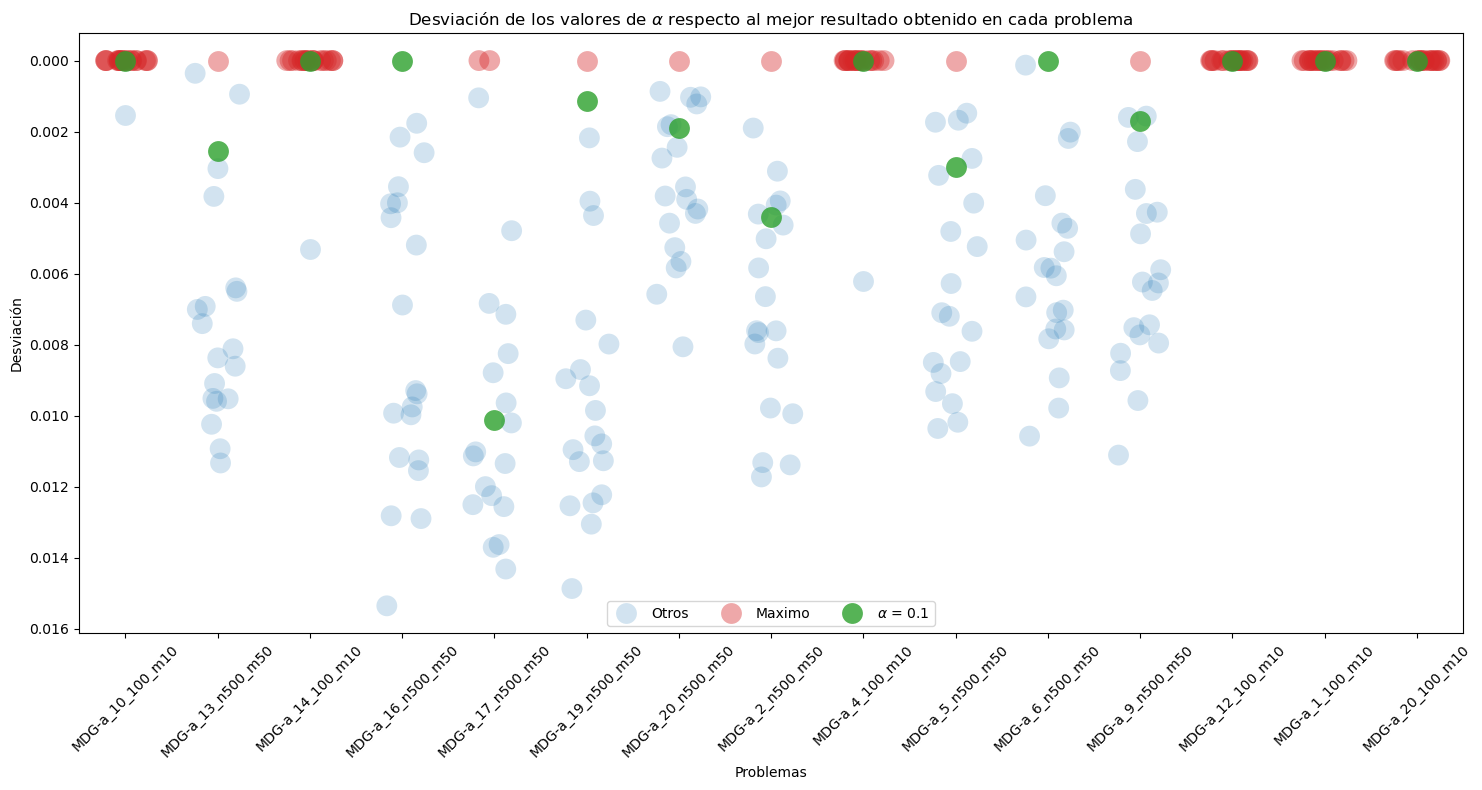

In [7]:
custom_palette = {
    'Otros': '#1f77b4',
    f"$\\alpha$ = {alpha_max_5}": '#2ca02c',
    'Maximo': '#d62728'
}

fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(data=data_5[data_5["Color"] == "Otros"], x="archivo", y="Dev", hue="Color", alpha=0.2, ax=ax, size=15, jitter=0.25, palette=custom_palette)
sns.stripplot(data=data_5[data_5["Color"] == "Maximo"], x="archivo", y="Dev", hue="Color", alpha=0.4, ax=ax, size=15, jitter=0.25, palette=custom_palette)
sns.stripplot(data=data_5[data_5["Color"] == f"$\\alpha$ = {alpha_max_5}"], x="archivo", y="Dev", hue="Color", alpha=0.8, ax=ax, size=15, jitter=0.25, palette=custom_palette)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel("Problemas")
ax.set_ylabel("Desviación")
ax.invert_yaxis()
plt.title("Desviación de los valores de $\\alpha$ respecto al mejor resultado obtenido en cada problema")
plt.legend(ncol=3, loc="lower center", bbox_to_anchor=(0.5, 0))
plt.tight_layout()
plt.show()

### 2.1.3 10 segundos de tiempo de ejecución

In [8]:
data_10, alpha_max_10 = calibrar_alfa("resultados/resultados_10.0s.csv")

# Seleccionar el mejor alfa
data_10.loc[:,["alpha","Dev"]].groupby("alpha").mean("Dev").sort_values("Dev").head()

,Dev
alpha,
0.05,0.002668
0.50,0.002839
0.10,0.002919
0.15,0.002924
0.00,0.002976


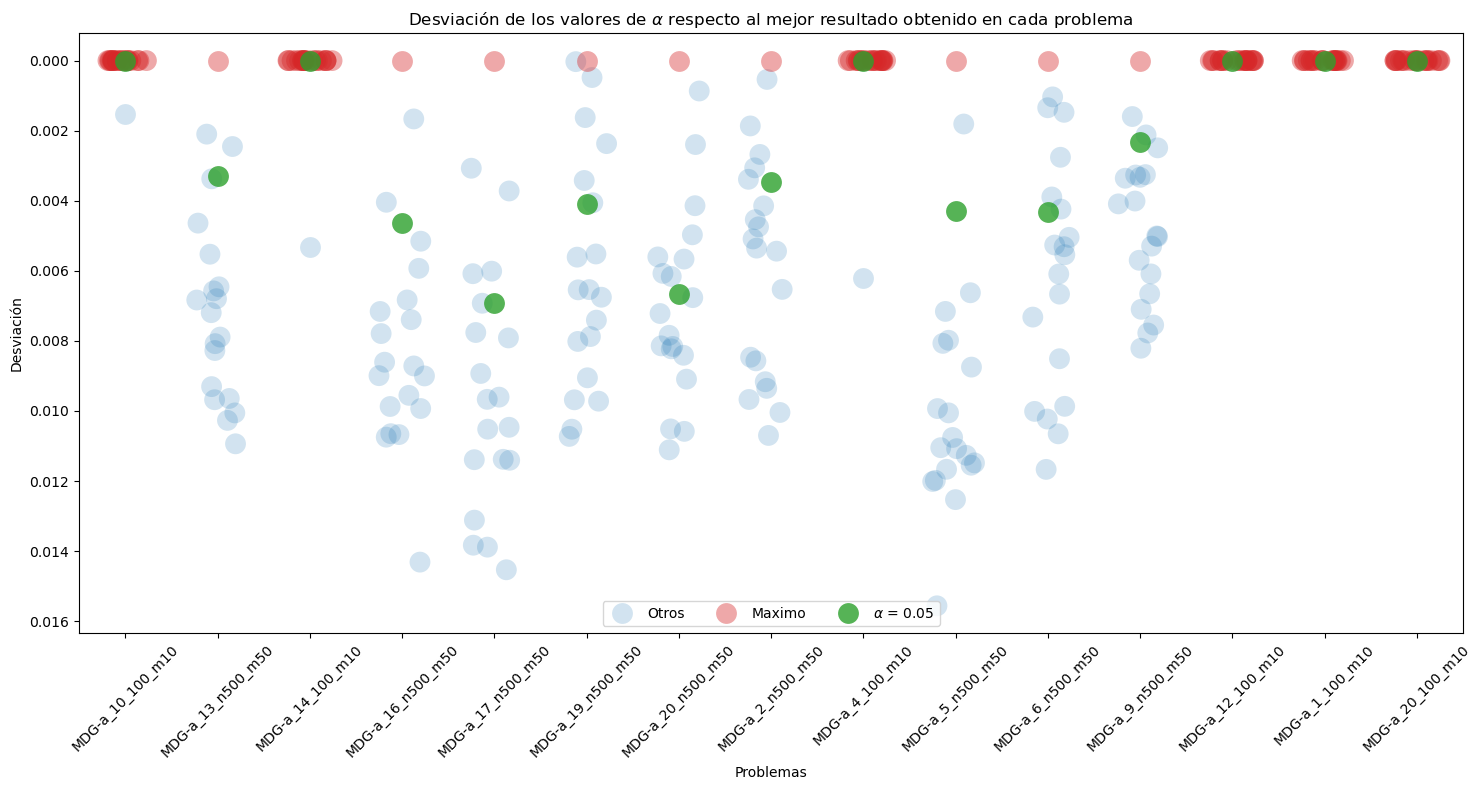

In [9]:
custom_palette = {
    'Otros': '#1f77b4',
    f"$\\alpha$ = {alpha_max_10}": '#2ca02c',
    'Maximo': '#d62728'
}

fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(data=data_10[data_10["Color"] == "Otros"], x="archivo", y="Dev", hue="Color", alpha=0.2, ax=ax, size=15, jitter=0.25, palette=custom_palette)
sns.stripplot(data=data_10[data_10["Color"] == "Maximo"], x="archivo", y="Dev", hue="Color", alpha=0.4, ax=ax, size=15, jitter=0.25, palette=custom_palette)
sns.stripplot(data=data_10[data_10["Color"] == f"$\\alpha$ = {alpha_max_10}"], x="archivo", y="Dev", hue="Color", alpha=0.8, ax=ax, size=15, jitter=0.25, palette=custom_palette)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel("Problemas")
ax.set_ylabel("Desviación")
ax.invert_yaxis()
plt.title("Desviación de los valores de $\\alpha$ respecto al mejor resultado obtenido en cada problema")
plt.legend(ncol=3, loc="lower center", bbox_to_anchor=(0.5, 0))
plt.tight_layout()
plt.show()

### 2.1.4 Selección de $\alpha$

In [10]:
data_todos = pd.concat([data_1, data_5, data_10])
data_todos["segundos"] = np.floor(data_todos["tiempo"])
data_todos = data_todos[["alpha","segundos","Dev"]]
data_todos_grouped = data_todos.groupby(["alpha","segundos"]).mean().reset_index()
data_todos_grouped["Dev"] = data_todos_grouped["Dev"] * 100

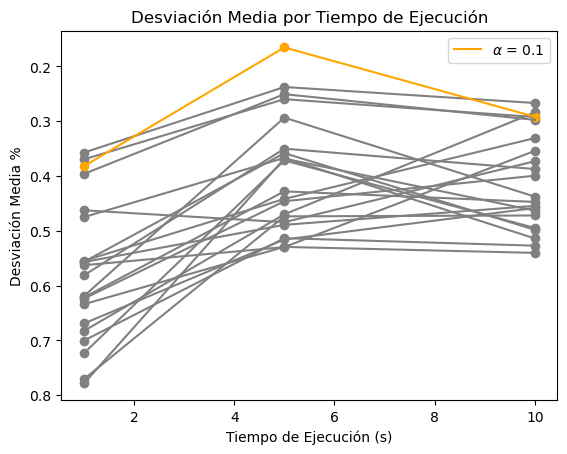

In [11]:
fig, ax = plt.subplots()
for alpha in [i / 100 for i in range(0,101)]:
    if alpha != 0.1:
        ax.plot(data_todos_grouped[data_todos_grouped["alpha"] == alpha]["segundos"], data_todos_grouped[data_todos_grouped["alpha"] == alpha]["Dev"], color = "gray")
        ax.scatter(x = data_todos_grouped[data_todos_grouped["alpha"] == alpha]["segundos"], y = data_todos_grouped[data_todos_grouped["alpha"] == alpha]["Dev"], color = "gray")
ax.plot(data_todos_grouped[data_todos_grouped["alpha"] == 0.1]["segundos"], data_todos_grouped[data_todos_grouped["alpha"] == 0.1]["Dev"], color = "orange", label = "$\\alpha$ = 0.1")
ax.scatter(x = data_todos_grouped[data_todos_grouped["alpha"] == 0.1]["segundos"], y = data_todos_grouped[data_todos_grouped["alpha"] == 0.1]["Dev"], color = "orange")
ax.invert_yaxis()
ax.set_xlabel("Tiempo de Ejecución (s)")
ax.set_ylabel("Desviación Media %")
ax.set_title("Desviación Media por Tiempo de Ejecución")
plt.legend()
plt.show()

Se utilizará $\alpha = 0.1$.

## 3. Path Relinking

## 4. Comparación

In [12]:
data_1_0_1 = data_1[data_1["alpha"] == 0.1].loc[:,["archivo","alpha","valor","tiempo"]]
data_1_0_1["t_objetivo"] = 1
data_5_0_1 = data_5[data_5["alpha"] == 0.1].loc[:,["archivo","alpha","valor","tiempo"]]
data_5_0_1["t_objetivo"] = 5
data_10_0_1 = data_10[data_10["alpha"] == 0.1].loc[:,["archivo","alpha","valor","tiempo"]]
data_10_0_1["t_objetivo"] = 10
data_60_0_1 = pd.read_csv("resultados/resultados_60.0s.csv", sep=";")
data_60_0_1["t_objetivo"] = 60

data_0_1 = pd.concat([data_1_0_1, data_5_0_1, data_10_0_1, data_60_0_1]).reset_index(drop=True)
data_0_1["Modelo"] = "GRASP"

data_pr_1 = pd.read_csv("resultados/resultados_pr_1.0s.csv", sep=";")
data_pr_1["t_objetivo"] = 1
data_pr_5 = pd.read_csv("resultados/resultados_pr_5.0s.csv", sep=";")
data_pr_5["t_objetivo"] = 5
data_pr_10 = pd.read_csv("resultados/resultados_pr_10.0s.csv", sep=";")
data_pr_10["t_objetivo"] = 10
data_pr_60 = pd.read_csv("resultados/resultados_pr_60.0s.csv", sep=";")
data_pr_60["t_objetivo"] = 60

data_pr = pd.concat([data_pr_1, data_pr_5, data_pr_10, data_pr_60]).reset_index(drop=True)
data_pr["Modelo"] = "GRASP + PR"

data_0_1 = pd.concat([data_0_1, data_pr]).reset_index(drop=True)
data_0_1["valor"] = round(data_0_1["valor"],2)

In [13]:
data_0_1_60 = data_0_1[data_0_1["t_objetivo"] == 60]
data_0_1_60 = data_0_1_60.reset_index(drop=True)

maximos_60 = data_0_1_60.groupby("archivo").max().reset_index().loc[:,["archivo","valor"]]
maximos_60 = maximos_60.rename(columns={"valor":"max"})

data_0_1_60= data_0_1_60.set_index('archivo').join(maximos_60.set_index('archivo')).reset_index()
data_0_1_60["dif"] = (data_0_1_60["max"] - data_0_1_60["valor"]) / data_0_1_60["max"] * 100

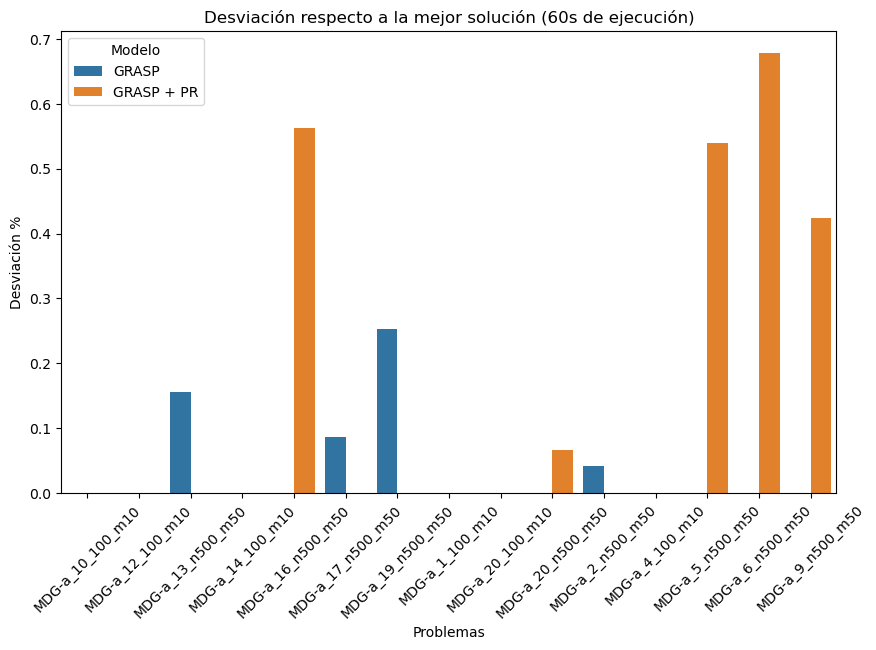

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=data_0_1_60, x='archivo', y='dif', hue='Modelo', ax=ax, errorbar=None)
ax.tick_params(axis='x', rotation=45)
ax.set_title("Desviación respecto a la mejor solución (60s de ejecución)")
ax.set_xlabel("Problemas")
ax.set_ylabel("Desviación %")
plt.show()

In [15]:
maximos = data_0_1.groupby(["archivo","t_objetivo"]).max().loc[:,["valor"]]
maximos = maximos.rename(columns={"valor":"max"})

tabla = data_0_1.set_index(["archivo","t_objetivo"]).join(maximos).reset_index()

tabla["n"] = 500
tabla.loc[tabla["archivo"].str.find("100") > -1,"n"] = 100

tabla["es_maximo"] = tabla["valor"] == tabla["max"]
tabla["dif"] = (tabla["max"] - tabla["valor"]) / tabla["max"]

In [16]:
tabla.groupby(["t_objetivo","n","Modelo"]).sum("es_maximo").loc[:,"es_maximo"]

t_objetivo  n    Modelo    
1           100  GRASP         6
                 GRASP + PR    4
            500  GRASP         8
                 GRASP + PR    1
5           100  GRASP         6
                 GRASP + PR    6
            500  GRASP         8
                 GRASP + PR    1
10          100  GRASP         6
                 GRASP + PR    6
            500  GRASP         6
                 GRASP + PR    3
60          100  GRASP         6
                 GRASP + PR    6
            500  GRASP         5
                 GRASP + PR    4
Name: es_maximo, dtype: int64

In [17]:
tabla.groupby(["t_objetivo","n","Modelo"]).mean("tiempo").loc[:,"tiempo"]

t_objetivo  n    Modelo    
1           100  GRASP          1.000333
                 GRASP + PR     1.037541
            500  GRASP          1.038133
                 GRASP + PR     1.485758
5           100  GRASP          5.000767
                 GRASP + PR     3.657180
            500  GRASP          5.019344
                 GRASP + PR     5.766493
10          100  GRASP         10.001283
                 GRASP + PR     6.175223
            500  GRASP         10.043767
                 GRASP + PR    10.704996
60          100  GRASP         60.000617
                 GRASP + PR    31.832023
            500  GRASP         60.050778
                 GRASP + PR    60.930445
Name: tiempo, dtype: float64

In [18]:
tabla.groupby(["t_objetivo","n","Modelo"]).mean("dif").loc[:,"dif"] * 100

t_objetivo  n    Modelo    
1           100  GRASP         0.000000
                 GRASP + PR    0.118527
            500  GRASP         0.011925
                 GRASP + PR    0.634533
5           100  GRASP         0.000000
                 GRASP + PR    0.000000
            500  GRASP         0.026300
                 GRASP + PR    0.717857
10          100  GRASP         0.000000
                 GRASP + PR    0.000000
            500  GRASP         0.119350
                 GRASP + PR    0.312648
60          100  GRASP         0.000000
                 GRASP + PR    0.000000
            500  GRASP         0.059700
                 GRASP + PR    0.252267
Name: dif, dtype: float64

## 5. Conclusiones

## 6. Bibliografía

Resende, M. G. C., Ribeiro, C. C., Glover, F., & Martí, R. (2010). Scatter search and path-relinking: Fundamentals, advances, and applications. En M. Gendreau & J.-Y. Potvin (Eds.), Handbook of Metaheuristics (pp. 87–107). Springer. https://doi.org/10.1007/978-1-4419-1665-5_4